In [33]:
import pandas as pd
import numpy as np
import os
from IPython.display import IFrame
import folium
import seaborn as sns
import glob
import networkx as nx
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import shap

In [4]:
location = '/Users/wentingjiang/Desktop/mda_kul_local/'
file_name = 'df_model_v2.csv'

In [14]:
df_model = pd.read_csv(location + file_name)

In [15]:
df_model.columns

Index(['Unnamed: 0', 'location', 'noise_level', 'event', 'count', 'hour',
       'day_of_week', 'humidity', 'temp', 'solar_radiation', 'rain_intensity',
       'daily_rain_sum', 'wind_dir', 'wind_speed', 'LC_RAD60', 'LC_TEMP_QCL0',
       'LC_TEMP_QCL1', 'LC_TEMP_QCL2', 'LC_TEMP_QCL3', 'lat', 'lon', 'alt',
       'climate_zone', 'green_cover', 'building_height', 'sky_view_factor',
       'installation_height', 'month'],
      dtype='object')

In [11]:
all_locations = list(set(df_model.location))
all_locations

['MP 03: Naamsestraat 62 Taste',
 'MP 05: Calvariekapel KU Leuven',
 'MP 07: Naamsestraat 81',
 'MP 06: Parkstraat 2 La Filosovia',
 'MP 01: Naamsestraat 35  Maxim',
 'MP 02: Naamsestraat 57 Xior']

In [24]:
#df_model_small = df_model[df_model['location']==loc_name].drop('location', axis=1)
df_model_small = df_model.drop('location', axis=1)
X = df_model_small.drop("noise_level", axis=1)
X = pd.get_dummies(X)
y = np.array(df_model_small['noise_level'])

In [25]:
# for loc_name in all_locations:
#     df_model_small = df_model[df_model['location']==loc_name].drop('location', axis=1)
#     X = df_model_small.drop("noise_level", axis=1)
#     X = pd.get_dummies(X)
#     y = np.array(df_model_small['noise_level'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [ ]:
# fit the model across all locations

In [27]:
# Create a random forest regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 50.81220432382136
R-squared: 0.35740783631014283


Text(0, 0.5, 'predicted')

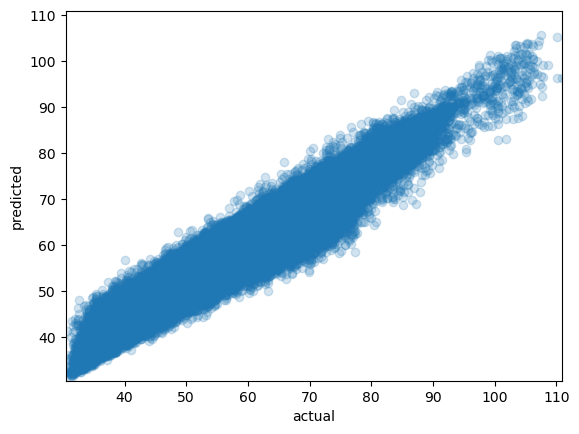

In [29]:
plt.scatter(y_train,regressor.predict(X_train), alpha=0.2)
lim_min = min(min(y_train), min(regressor.predict(X_train)))
lim_max = max(max(y_train), max(regressor.predict(X_train)))

plt.xlim([lim_min,lim_max])
plt.ylim([lim_min,lim_max])
plt.xlabel('actual')
plt.ylabel('predicted')

In [31]:
regressor_full = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_full.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
# Generate SHAP values for your model
explainer = shap.Explainer(regressor_full)
shap_values = explainer.shap_values(X)

In [ ]:
shap_values = pd.DataFrame(shap_values)
shap_values.columns = list(X.columns)
location_and_explaination = pd.concat([df_model[['location']], shap_values], axis=1)

In [ ]:
location_and_explaination.head()